# Trabajo Final de Análisis Exploratorio de Datos.
## Maestría en Ciencia de Datos. 
## Dataset sobre Carros de USA. 
Presentado por:
- Víctor Manuel Cardona Munera
- Laura Loaiza Palacio






In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

# Contexto:

Los datos de US Cars se extrajeron de AUCTION EXPORT.com. Este conjunto de datos incluyen información sobre 28 marcas de vehículos limpios y usados a la venta en EE. UU. Se ensamblaron doce características para cada automóvil en el conjunto de datos.

- **Price:**	Integer	 Precio de venta en la ad

- **Years:**	Integer	Año de registro del vehiculo

- **Brand:**	String	Marca del carro

- **Model:**	String	modelo del carro

- **Color:**	String	Color

- **State/City:**	String	Localizacion donde esta el carro

- **Mileage:**	Float	millas del carro

- **Vin:**	String	La placa del carro

- **Title:** Status	String	Carros accidentados y no accidentados 

- **Lot:**	Integer	Un número de lote es un número de identificación asignado a una cantidad particular o lote de material de un solo fabricante. Para automóviles, un número de lote se combina con un número de serie para formar el Número de identificación del vehículo.

- **Condition:**	String	Tiempo


# Preguntas Smart:

- ¿Cuál es la marca de automovil mas representativa en USA para este dataset?

- ¿Cuál es el estado con mas carros en venta?

- ¿Cuál es el porcentaje de vehiculos accidentados restaurados en venta?

- ¿El color del carro tiene alguna relación con su precio?

- Tendencias



# 1. Conocomiento y Análisis Básico del Dataset

## Tipos de datos

In [2]:
df = pd.read_csv("USA_cars_datasets.csv")
df.info() #Leemos el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Ninguna columna tiene null values, además de eso, los tipos de datos de cada varible están correctos. No hay necesidad de corregir las columnas. 

In [3]:
df.nunique() #datos únicos

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

Este dataset contiene 28 marcas de vehiculos de 30 años diferentes, ubicados en 44 Estados de Estados Unidos.

In [4]:
df.head(10) #Mostramos las primeras 10 filas del dataset. 

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [5]:
df.tail(10) #Mostramos las últimas 10 filas del dataset. 

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2489,2489,13900,nissan,rogue,2018,clean vehicle,40259.0,gray,knmat2mt9jp582734,167762219,florida,usa,21 hours left
2490,2490,10400,nissan,sentra,2019,clean vehicle,25264.0,blue,3n1ab7ap4ky323241,167722702,california,usa,1 days left
2491,2491,9200,nissan,versa,2018,clean vehicle,35677.0,black,3n1cn7ap7jl882312,167762221,florida,usa,21 hours left
2492,2492,7400,nissan,versa,2019,clean vehicle,35511.0,black,3n1cn7ap5kl841811,167722706,california,usa,1 days left
2493,2493,9200,nissan,versa,2018,clean vehicle,33027.0,black,3n1cn7ap0jl883768,167762224,florida,usa,21 hours left
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [6]:
df.shape

(2499, 13)

Este dataset tiene 2499 filas y 13 columnas

In [7]:
df.size

32487

En total contiene 32.487 datos. 

## Descripción

In [8]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


En la tabla anterior se observa una descripción estadística sólo de las variables cuantitativas. Para conocer la descripción estadistica de todas las variables, tanto cuantitativas como cualitativas, escribimos la siguiente línea de código:


In [9]:
df.describe(include = "all")

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
count,2499.000000,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499,2.499000e+03,2499,2499,2499
unique,NaN,NaN,28,127,NaN,2,NaN,49,2495,NaN,44,2,47
top,NaN,NaN,ford,door,NaN,clean vehicle,NaN,white,1gnevhkw8jj148388,NaN,pennsylvania,usa,2 days left
freq,NaN,NaN,1235,651,NaN,2336,NaN,707,2,NaN,299,2492,832
mean,1249.000000,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN,1.676914e+08,NaN,NaN,NaN
std,721.543484,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN,2.038772e+05,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN,1.593488e+08,NaN,NaN,NaN
25%,624.500000,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN,1.676253e+08,NaN,NaN,NaN
50%,1249.000000,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN,1.677451e+08,NaN,NaN,NaN
75%,1873.500000,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN,1.677798e+08,NaN,NaN,NaN


In [10]:
df = df.drop(columns=(['Unnamed: 0','vin','lot','condition']))
#Borramos las columnas Unnamed, vin, lot y condition debido a que no aportan datos relevantes en nuestro dataset. 
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


## 2. Búsqueda - Análisis de Datos Nulos 

In [11]:
missing_data = df.isnull()
missing_data.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()  

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

Este dataset no contiene datos nulos o vacíos. 

# 3. Análisis Univariado - Estadístico y Gráfico. 

## Análisis de Variables Cualitativas

- ## Análisis de la variable: Brand

In [13]:
#Tabla de frecuencia para Marcas
tabla_marcas=pd.crosstab(index=df["brand"], columns="count").reset_index()
tabla_marcas['Freq. Rel']=tabla_marcas['count']/sum(tabla_marcas['count'])
tabla_marcas = tabla_marcas.sort_values(by='count', ascending=False)
tabla_marcas

col_0,brand,count,Freq. Rel
8,ford,1235,0.494198
7,dodge,432,0.172869
24,nissan,312,0.124850
5,chevrolet,297,0.118848
9,gmc,42,0.016807
16,jeep,30,0.012005
6,chrysler,18,0.007203
2,bmw,17,0.006803
13,hyundai,15,0.006002
3,buick,13,0.005202


Las marcas más vendidas en este dataset de clasificados de vehiculos son Ford y Dodge

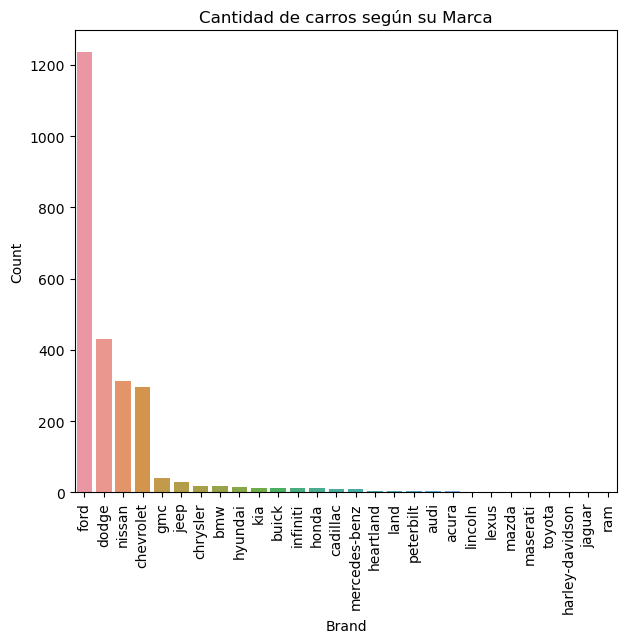

In [18]:
plt.figure(figsize=(7, 6))
# Ordenar las columns en ascending
order = df['brand'].value_counts().index
sns.countplot(x=df['brand'], order=order)
plt.title("Cantidad de carros según su Marca")
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- ## Análisis de la variable: Model

In [19]:
##Tabla de frecuencia para Modelos
tabla_modelo=pd.crosstab(index=df['model'], columns="count").reset_index()
tabla_modelo['Freq. Rel']=tabla_modelo['count']/sum(tabla_modelo['count'])
tabla_modelo = tabla_modelo.sort_values(by='count', ascending=False)
tabla_modelo

col_0,model,count,Freq. Rel
32,door,651,0.260504
50,f-150,219,0.087635
33,doors,148,0.059224
12,caravan,102,0.040816
75,mpv,87,0.034814
...,...,...,...
90,road/street,1,0.000400
28,cx-3,1,0.000400
52,f-750,1,0.000400
25,cruiser,1,0.000400


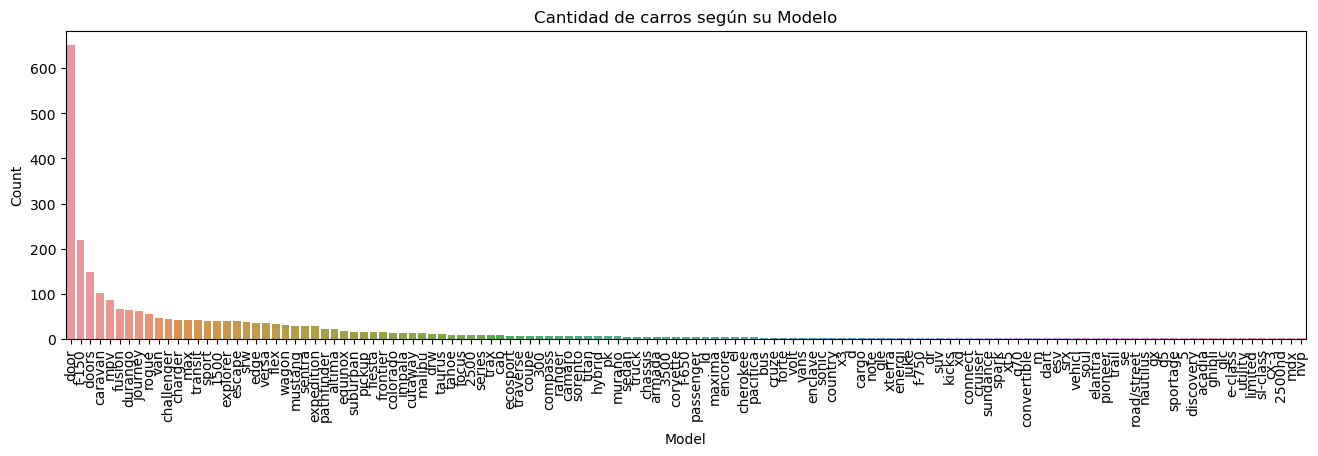

In [36]:
plt.figure(figsize=(16, 4))
# Ordenar las columns en ascending
order = df['model'].value_counts().index
sns.countplot(x=df['model'], order=order)
plt.title("Cantidad de carros según su Modelo")
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [37]:
filtered_df = df[df['model'] == 'doors']
filtered_df.head(10)

,price,brand,model,year,title_status,mileage,color,state,country
28,4190,ford,doors,2017,clean vehicle,44174.0,white,texas,usa
143,7210,dodge,doors,2018,clean vehicle,38910.0,black,florida,usa
146,6800,dodge,doors,2018,clean vehicle,36767.0,gray,florida,usa
151,6440,chrysler,doors,2018,clean vehicle,20942.0,gray,florida,usa
163,6060,dodge,doors,2018,clean vehicle,32504.0,black,florida,usa
166,6140,dodge,doors,2018,clean vehicle,52966.0,silver,florida,usa
169,6760,dodge,doors,2018,clean vehicle,35461.0,white,florida,usa
202,3160,ford,doors,2017,clean vehicle,31563.0,gray,texas,usa
220,4130,ford,doors,2017,clean vehicle,42426.0,gray,texas,usa
229,4080,ford,doors,2017,clean vehicle,61027.0,black,texas,usa


En el top 3 de los modelos mas vendidos tenemos los modelos door, f-150, doors. los modelos door y doors se repiten en varias marcas de carros, y posiblemente sea una incongruencia. 

- ## Análisis de la variable: State

In [39]:
#Estados y su numero de anuncios
tabla_state=pd.crosstab(index=df["state"], columns="count").reset_index()
tabla_state['Freq. Rel']=tabla_state['count']/sum(tabla_state['count'])
tabla_state = tabla_state.sort_values(by='count', ascending=False)
tabla_state

col_0,state,count,Freq. Rel
32,pennsylvania,299,0.119648
6,florida,246,0.098439
36,texas,214,0.085634
3,california,190,0.076030
16,michigan,169,0.067627
27,north carolina,146,0.058423
17,minnesota,119,0.047619
9,illinois,113,0.045218
42,wisconsin,94,0.037615
39,virginia,90,0.036014


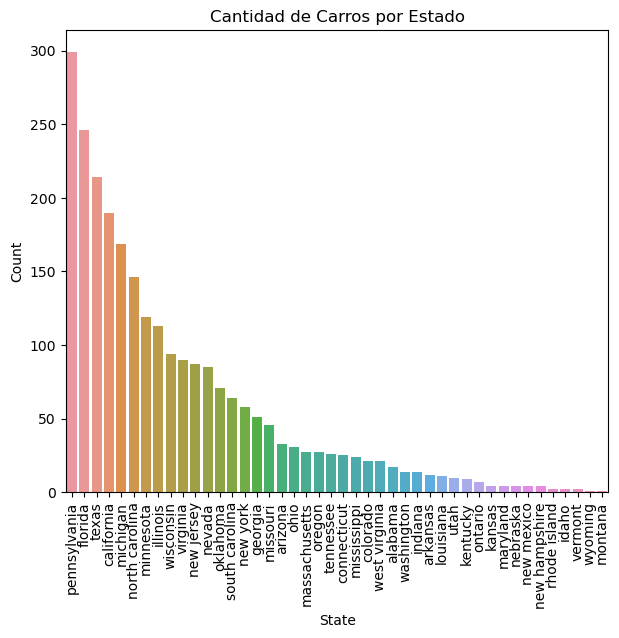

In [40]:
#Grafica de barras de "state" 
plt.figure(figsize=(7, 6))
order = df['state'].value_counts().index
sns.countplot(x=df['state'], order=order)
plt.title("Cantidad de Carros por Estado")
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 - ## Análisis de la variable: Title Status 

In [22]:
#Conteo de carros limpios y accidentados recuperados
tabla_status=pd.crosstab(index=df["title_status"], columns="count").reset_index()
tabla_status['Freq. Rel']=tabla_status['count']/sum(tabla_status['count'])
tabla_status

col_0,title_status,count,Freq. Rel
0,clean vehicle,2336,0.934774
1,salvage insurance,163,0.065226


El porcentaje de carros rescatados es del 6.52%

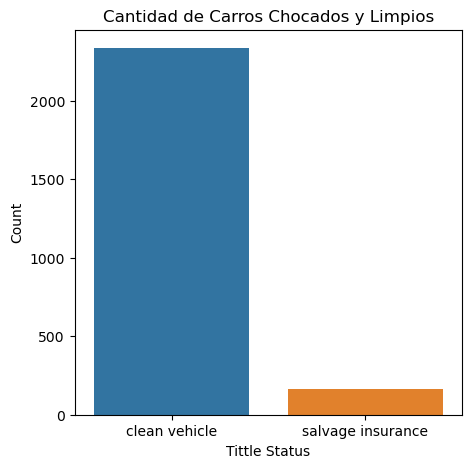

In [41]:
plt.figure(figsize=(5, 5))
order = df['title_status'].value_counts().index
sns.countplot(x=df['title_status'], order=order)
plt.title("Cantidad de Carros Chocados y Limpios")
plt.xlabel('Tittle Status')
plt.ylabel('Count')
plt.show()

- ## Análisis de la variable: Year

In [42]:
#Numero de carros en venta agrupados por su año de producción
tabla_year=pd.crosstab(index=df["year"], columns="count").reset_index()
tabla_year['Freq. Rel']=tabla_year['count']/sum(tabla_marcas['count'])
tabla_year = tabla_year.sort_values(by='count', ascending=False)
tabla_year

col_0,year,count,Freq. Rel
28,2019,892,0.356943
27,2018,395,0.158063
26,2017,377,0.150860
25,2016,203,0.081232
24,2015,196,0.078431
23,2014,104,0.041617
22,2013,86,0.034414
21,2012,72,0.028812
29,2020,48,0.019208
20,2011,23,0.009204


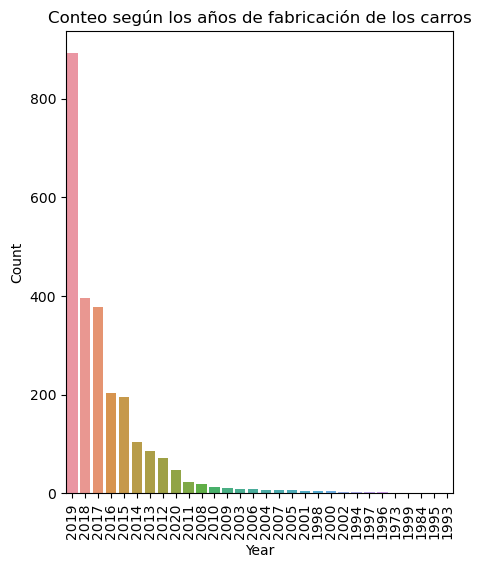

In [43]:
#Carros en venta agrupados segun su año
plt.figure(figsize=(5, 6))
order = df['year'].value_counts().index
sns.countplot(x=df['year'], order=order)
plt.title("Conteo según los años de fabricación de los carros")
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Los carros que más se vendieron fueron los fabricados en el año 2019, las ventas fueron mayores en carros fabricados en los años más recientes. 

# Análisis de las Variables Cuantitativas

# Visualización Gráfica de las Variables Cuantitativas: Price - Mileage

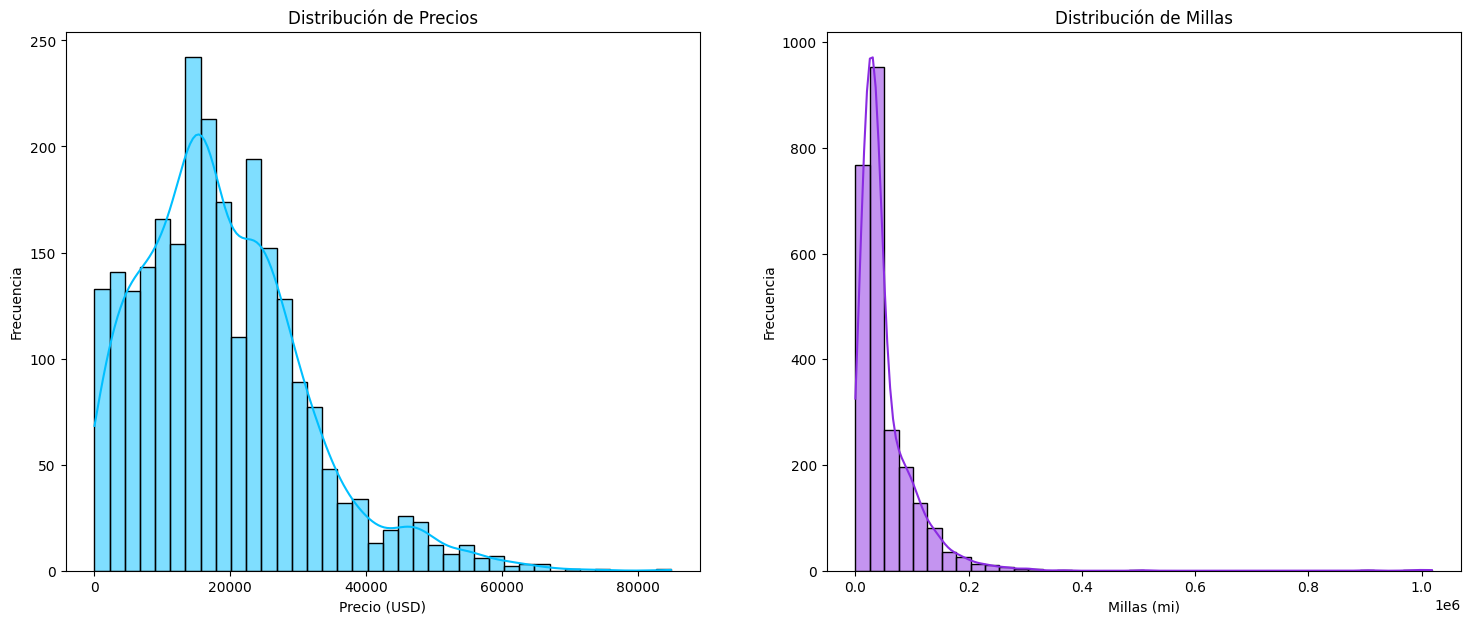

In [33]:
#Distribucion de la variable precio y millas
# Crear los histogramas por separado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
sns.histplot(x=df['price'], kde=True, color="deepskyblue", ax=axes[0])
sns.histplot(x=df['mileage'], kde=True, color="blueviolet", bins=40, ax=axes[1])


axes[0].set_title('Distribución de Precios')
axes[0].set_xlabel('Precio (USD)')
axes[0].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Millas')
axes[1].set_xlabel('Millas (mi)')
axes[1].set_ylabel('Frecuencia')

# Mostrar el subplot
plt.show()

En las gráficas anteriores se observan sesgos hacía la derecha, es decir, hay varios datos dispersos hacía la derecha en ambas distribuciones, sin embargo, es normal que el precio de un carro esté entre los (60.000-80.000) USD. 
Pero, en la gráfica de las millas recorridas, hay un carro que aparentemente ha recorrido 1.000.000 de millas, esta cantidad es muy grande y puede ser tomada como un Outlier. Esto lo vamos a determinar más adelante. 

## Análisis de Tendencias



In [44]:
#Marca más ofertadas en cada Estado
count_df = df.groupby(['state', 'brand']).size().reset_index(name='count')
most_sold = count_df.loc[count_df.groupby('state')['count'].idxmax()]

print(most_sold)

              state      brand  count
1           alabama       ford     11
7           arizona     nissan     16
9          arkansas       ford      7
16       california       ford     72
27         colorado       ford     10
30      connecticut       ford     11
40          florida       ford     83
55          georgia       ford     17
59            idaho       ford      2
64         illinois       ford     68
66          indiana  chevrolet      5
72           kansas  chevrolet      2
76         kentucky       ford      8
78        louisiana       ford      8
80         maryland      dodge      1
86    massachusetts       ford     20
95         michigan       ford     97
103       minnesota     nissan     59
105     mississippi       ford     21
109        missouri       ford     23
112         montana       ford      1
113        nebraska  chevrolet      2
117          nevada       ford     42
118   new hampshire       ford      2
123      new jersey       ford     49
130      new

In [45]:
#Marca con más carros ofertados de este dataset
brand_most_sold = df.groupby(['brand']).size().reset_index(name='count')
brand_most_sold = brand_most_sold.sort_values(by='count', ascending=False)

print(brand_most_sold)

              brand  count
8              ford   1235
7             dodge    432
24           nissan    312
5         chevrolet    297
9               gmc     42
16             jeep     30
6          chrysler     18
2               bmw     17
13          hyundai     15
3             buick     13
17              kia     13
12            honda     12
14         infiniti     12
23    mercedes-benz     10
4          cadillac     10
11        heartland      5
1              audi      4
25        peterbilt      4
18             land      4
0             acura      3
20          lincoln      2
22            mazda      2
19            lexus      2
21         maserati      1
15           jaguar      1
10  harley-davidson      1
26              ram      1
27           toyota      1


In [46]:
#Color más ofertado de cada marca
count_df = df.groupby(['brand', 'color']).size().reset_index(name='count')
color_most_sold = count_df.loc[count_df.groupby('brand')['count'].idxmax()]
print(color_most_sold)

               brand   color  count
0              acura   black      1
3               audi   black      3
6                bmw    blue      5
18             buick     red      3
24          cadillac   white      4
39         chevrolet   white    104
43          chrysler    gray      9
64             dodge   white    109
93              ford   white    406
96               gmc   black     14
104  harley-davidson   black      1
106        heartland   white      3
113            honda   white      3
117          hyundai     red      4
124         infiniti    gray      4
126           jaguar   black      1
132             jeep     red      8
141              kia  silver      4
142             land   black      4
143            lexus   black      1
145          lincoln   black      1
147         maserati   black      1
148            mazda    gray      2
153    mercedes-benz   white      6
155           nissan   black     84
171        peterbilt    blue      2
174              ram   white

# 4.  Búsqueda - Análisis de Outliers

In [47]:
#Función para encontrar Outliers en el dataset.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

- ## Outliers de Mileage

In [48]:

outliers = find_outliers_IQR(df['mileage'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

outliers

número de outliers: 189
max valor outlier: 1017936.0
min valor outlier: 126523.0


0       274117.0
1       190552.0
6       149050.0
13      138650.0
39      176567.0
          ...   
2410    161836.0
2414    155704.0
2415    234792.0
2418    132655.0
2443    127780.0
Name: mileage, Length: 189, dtype: float64

In [49]:
df2=df[df['mileage']>125000].reset_index(drop=True) ##Tabla que contiene sólo los datos de Mileage mayores a 125.000 para ver la 
#cantidad de posibles Outliers
df2

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,georgia,usa
3,5430,chrysler,wagon,2017,clean vehicle,138650.0,gray,texas,usa
4,7000,ford,pk,2003,clean vehicle,176567.0,white,tennessee,usa
...,...,...,...,...,...,...,...,...,...
189,2425,nissan,door,2012,salvage insurance,161836.0,black,tennessee,usa
190,2100,nissan,door,2013,salvage insurance,155704.0,silver,tennessee,usa
191,800,nissan,door,2012,salvage insurance,234792.0,black,florida,usa
192,3000,nissan,door,2015,clean vehicle,132655.0,beige,pennsylvania,usa


En la tabla anterior se observa por ejemplo, un carro Toyota que ha recorrido 274.117 millas, a pesar de ser una cifra grande, el carro es del año 2008 y podría resultar normal que en ese tiempo haya recorrido esa cantidad de millas.
Asimismo, hay un carro Nissan del año 2012 con 234.792 millas, es una cantidad alta para un carro fabricado en 2012, pero el precio es muy bajo, el carro cuesta 800 USD, es posible que una de las razones de que el precio sea bajo es que ha recorrido muchas millas. 

In [50]:
df3=df[df['mileage']<125000].reset_index(drop=True) #Tabla que conteiene sólo los datos de Mileage menores a 125.000 para observar la 
#gráfica sin los posibles Outliers
df3.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
1,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
2,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
3,5700,dodge,mpv,2018,clean vehicle,45561.0,white,texas,usa
4,13350,gmc,door,2017,clean vehicle,23525.0,gray,california,usa


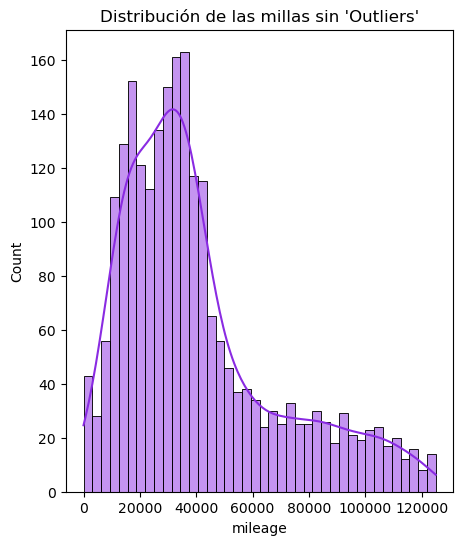

In [51]:
plt.figure(figsize=(5, 6))
ax=sns.histplot(x=df3['mileage'],kde=True,color="blueviolet", bins =40)
plt.title("Distribución de las millas sin 'Outliers'")
plt.show() 



Dibujamos la gráfica de distribución de los datos de Mileage sin los posibles Outliers, la gráfica sigue mostrando un sesgo hacia la derecha, pero es mucho menor a la anterior y no consideramos átipicos esos valores en las millas. 

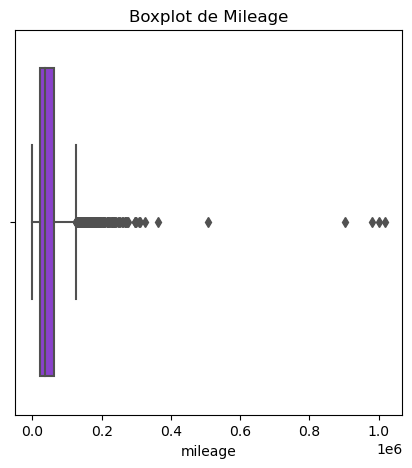

In [52]:
fig_boxplot = plt.figure(figsize=(5,5)) 
ax=sns.boxplot(x=df["mileage"], color = "blueviolet")  
plt.title("Boxplot de Mileage")
  
plt.show() 

- ## Outliers de Price

In [53]:

outliers = find_outliers_IQR(df['price'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 64
max valor outlier: 84900
min valor outlier: 49000
44      55000
49      54000
95      53500
127     53000
277     67000
        ...  
2059    49000
2088    59900
2196    50500
2198    55000
2200    56000
Name: price, Length: 64, dtype: int64


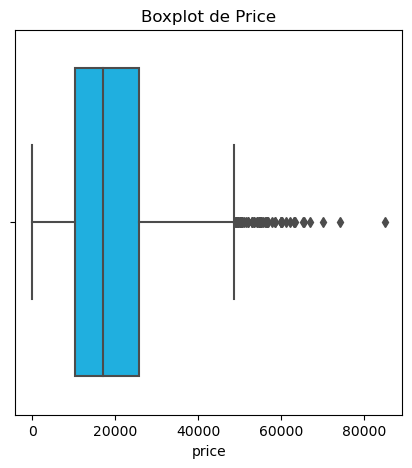

In [54]:
fig_boxplot = plt.figure(figsize=(5,5)) 
ax=sns.boxplot(x=df["price"], color = "deepskyblue") 
plt.title("Boxplot de Price")       
plt.show()  

# 5. Análisis Multivariado 
## Análisis de correlación entre variables





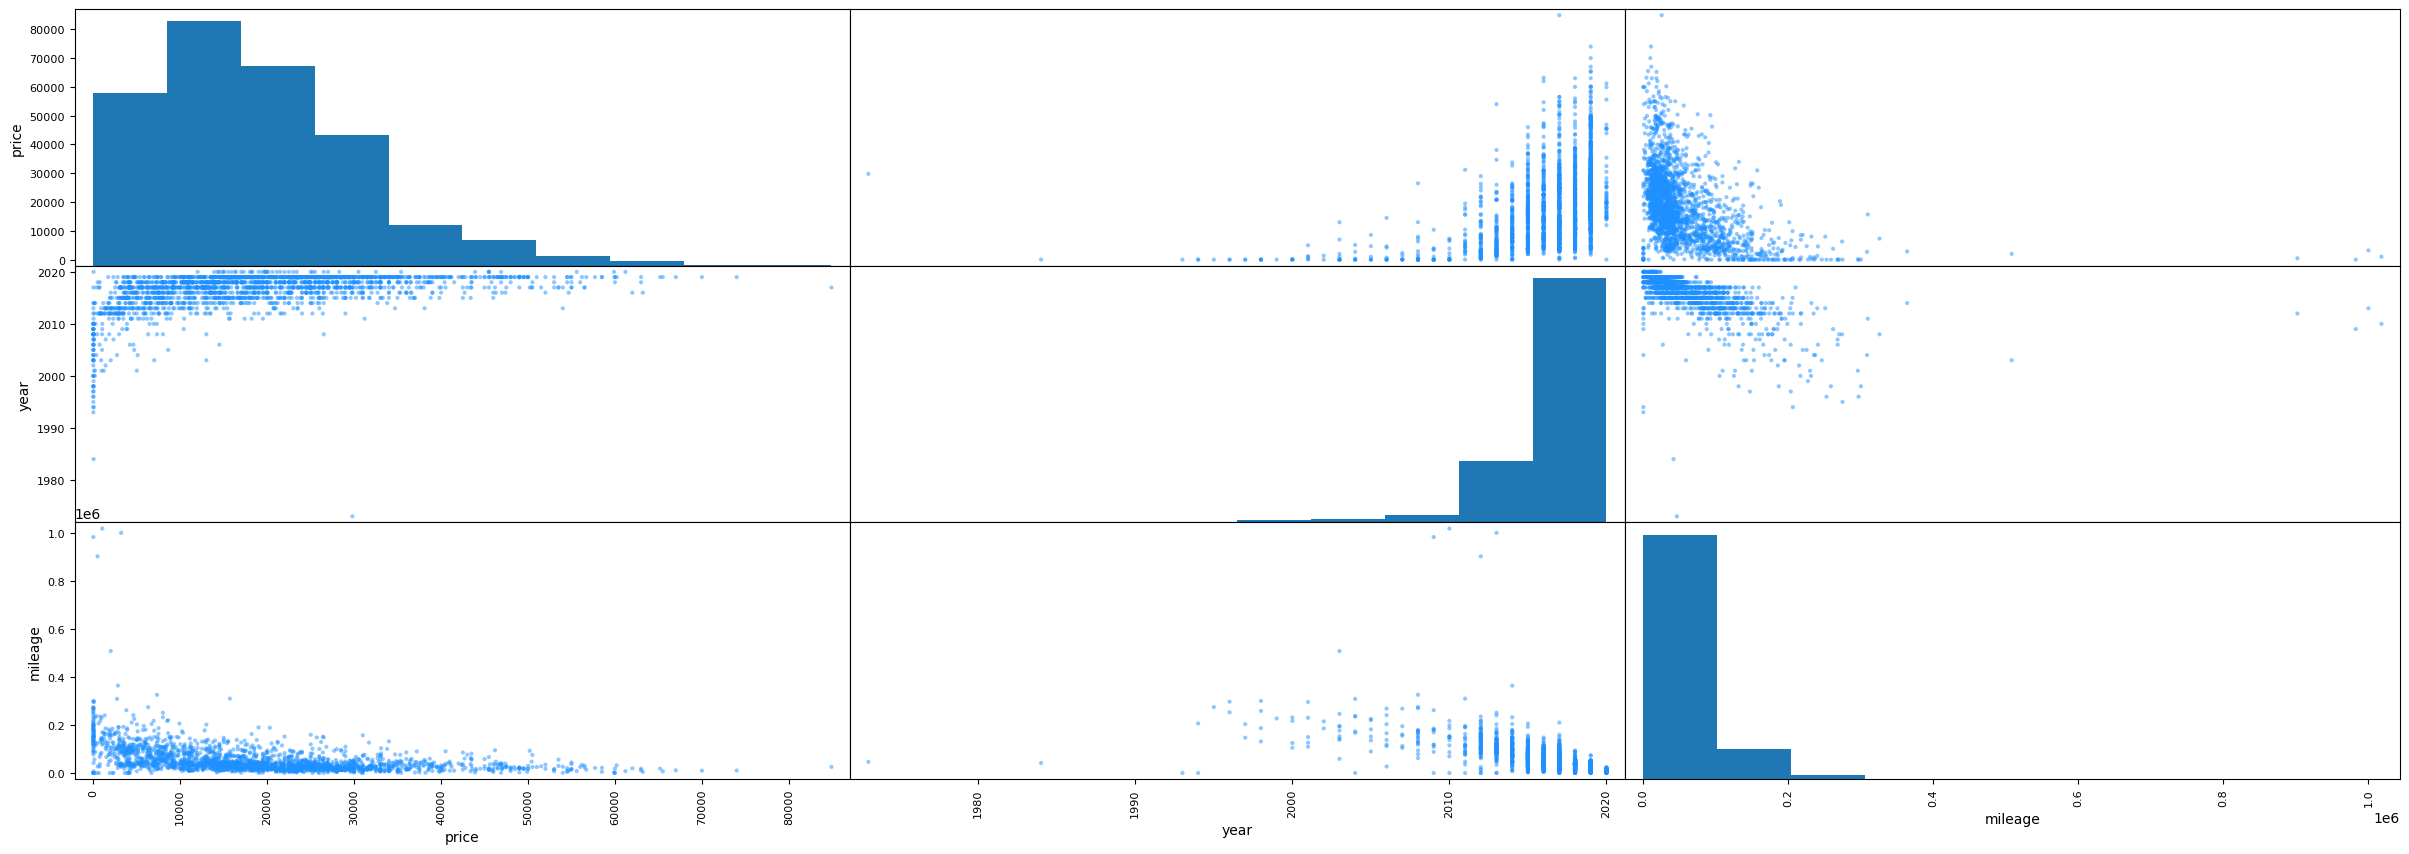

In [55]:
#Matrix de comparacion de variables cuantitativas
import pandas as pd
pd.plotting.scatter_matrix(df, figsize = (30, 10), color = "dodgerblue")
plt.show()

En las gráficas anteriores no se visualiza nigún patrón de correlación entre variables, no se observa ninguna tendencia, ni se ve graficamente alguna elipse. 

Text(0, 0.5, 'Price')

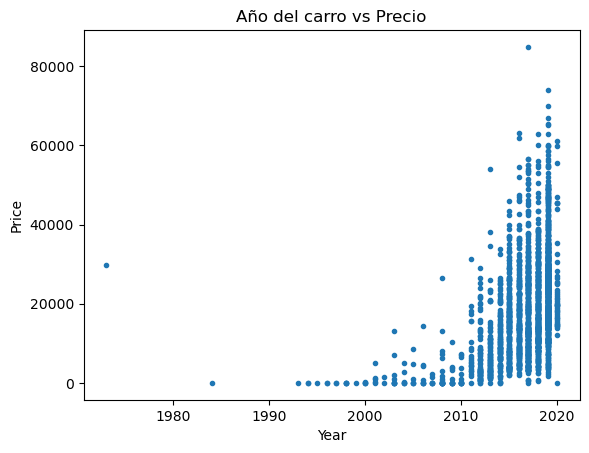

In [56]:
#Precio vs Año del carro
año = df["year"]
precio = df["price"]
plt.plot(año, precio, '.')
plt.title("Año del carro vs Precio")
plt.xlabel('Year')
plt.ylabel('Price')


In [27]:
from scipy.stats import pearsonr
Coef,vp=pearsonr(df["year"],df["price"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= 0.41827356849179376, Valor-p= 2.016976318682007e-106


Text(0, 0.5, 'Price')

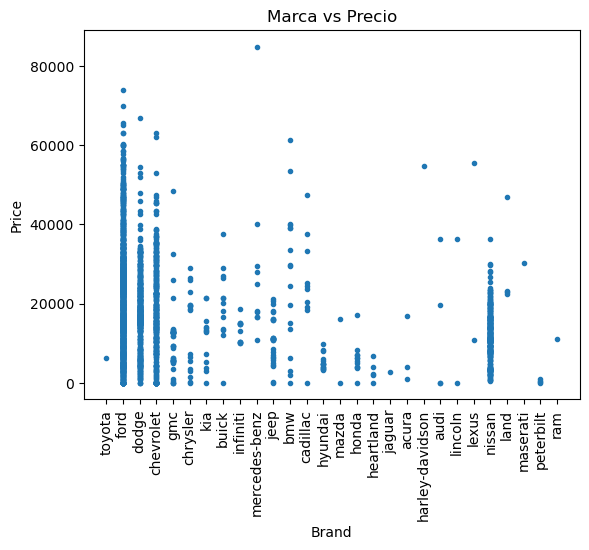

In [57]:
#Precio vs Marca
marca = df["brand"]
precio = df["price"]
plt.plot(marca, precio, '.')
plt.title("Marca vs Precio")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

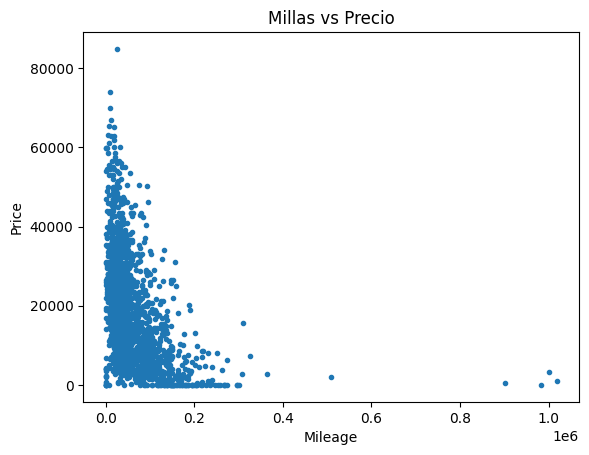

In [47]:
#precio vs Millas
millas = df["mileage"]
precio = df["price"]
plt.plot(millas, precio, '.')
plt.title("Millas vs Precio")
plt.xlabel("Mileage")
plt.ylabel("Price")

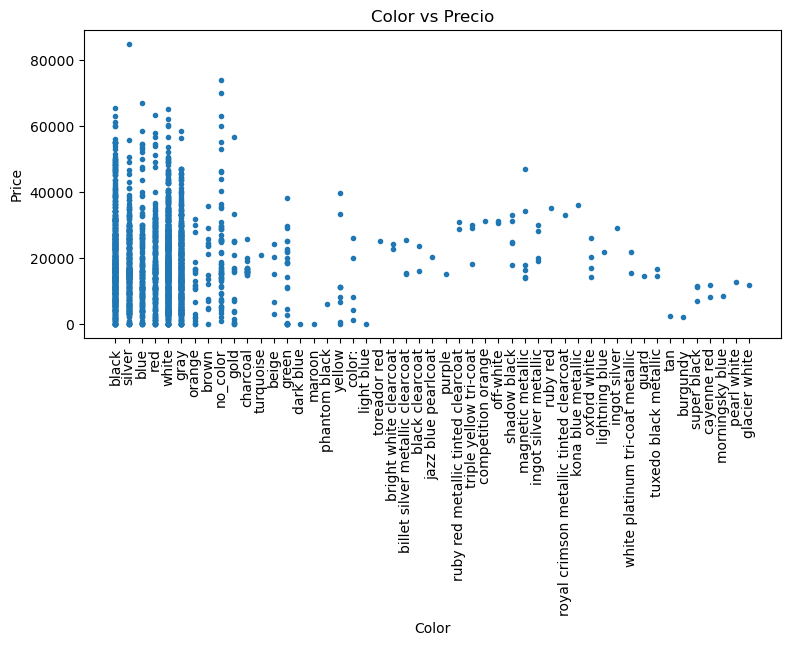

In [58]:
#Color vs precio
fig_boxplot = plt.figure(figsize=(9,4)) 
plt.plot(df['color'], df['price'], '.')
plt.title("Color vs Precio")
plt.xlabel("Color")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

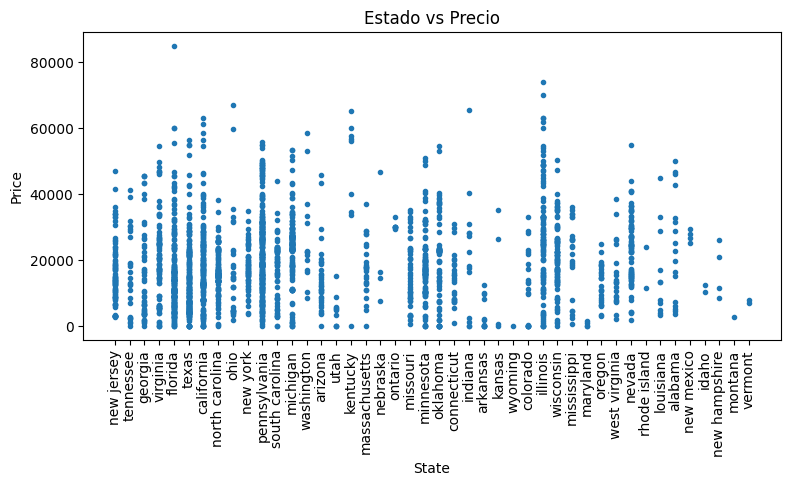

In [49]:
#Estado vs precio
fig_boxplot = plt.figure(figsize=(9,4)) 
plt.plot(df['state'], df['price'], '.')
plt.title("Estado vs Precio")
plt.xlabel("State")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Precio')

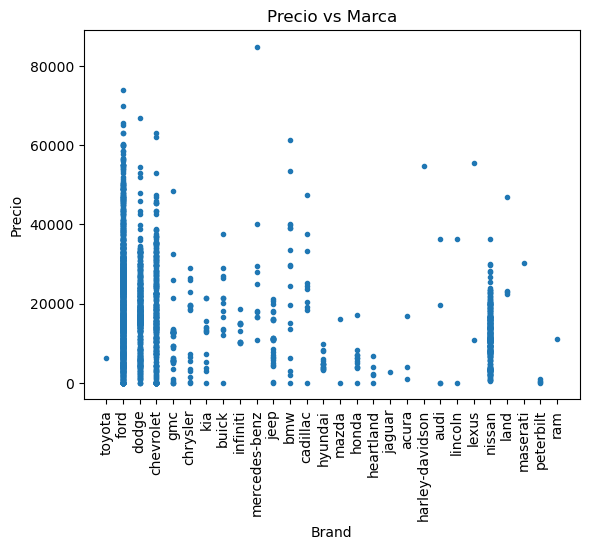

In [59]:
marca = df["brand"]
precio = df["price"]
plt.plot(marca, precio, '.')
plt.xticks(rotation=90)
plt.title("Precio vs Marca")
plt.xlabel("Brand")
plt.ylabel("Precio")

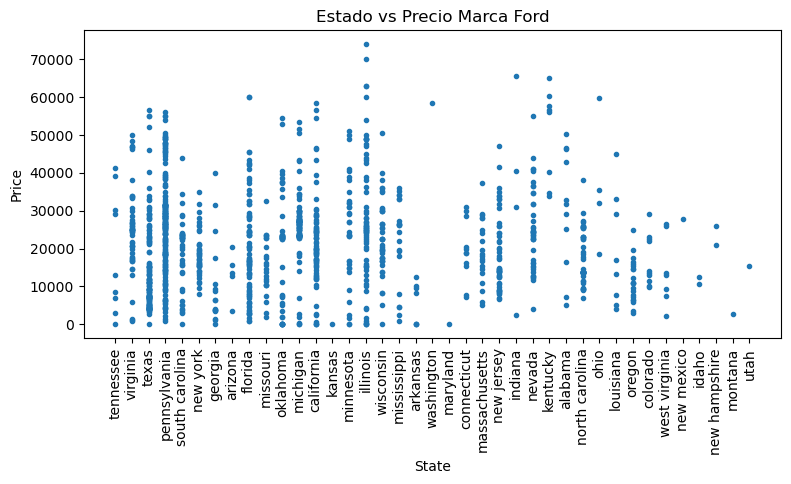

In [14]:
#Estado vs precio (Filtrando por la marca Ford)
ford_df = df[df['brand'] == 'ford']
fig_boxplot = plt.figure(figsize=(9,4)) 
plt.plot(ford_df['state'], ford_df['price'], '.')
plt.xticks(rotation=90)
plt.title("Estado vs Precio Marca Ford")
plt.xlabel("State")
plt.ylabel("Price")
plt.show()

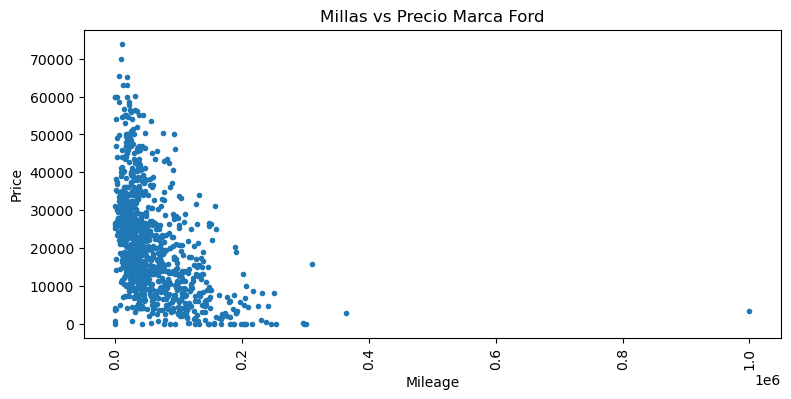

In [28]:
#Estado vs precio (Filtrando por la marca Ford)
ford_df = df[df['brand'] == 'ford']
fig_boxplot = plt.figure(figsize=(9,4)) 
plt.plot(ford_df['mileage'], ford_df['price'], '.')
plt.xticks(rotation=90)
plt.title("Millas vs Precio Marca Ford")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

Graficamente no se evidencia ninguna correlación entre las variables, sin embargo, vamos a verificar con Pearson si existe alguna correlación entre variables. 

In [21]:
from scipy.stats import pearsonr
Coef,vp=pearsonr(df["mileage"],df["price"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= -0.4008381863293672, Valor-p= 4.251481046096957e-97


Matriz de correlación variables cuantitativas:


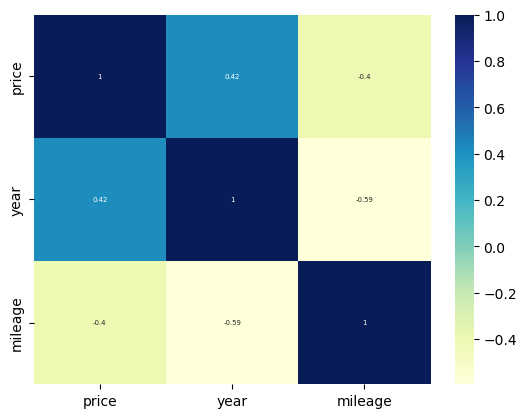

In [52]:
# Mostrar una matriz de correlación de las variables numéricas
print("Matriz de correlación variables cuantitativas:")
corr = df.select_dtypes(include=[np.number]).corr(method='pearson')
sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws={"fontsize":5})
plt.show()
        

Los valores de las correlaciones son bajos, el único valor "moderado" es el valor de la correlación entre "year" y "mileage", el cual es de -0,59. Con el resto de las variables se podría decir que no existe correlación. 

# 6. Class, Costum Transformers y Pipelines

## Definiendo la clase eda 

In [53]:
class eda:
    def __init__(self, df):
        self.df = df
        
    def eda_inicial(self):
        #EXPLORACIÓN INICIAL DEL DATASET: 

        # Imprimir las primeras 10 filas del dataset
        print("Primeras 10 filas del dataset:")
        print(self.df.head(10))

        # Imprimir las últimas 10 filas del dataset
        print("Primeras 10 filas del dataset:")
        print(self.df.tail(10))

        # Tamaño del dataset
        print("\nNúmero de filas y columnas del dataset:")
        print(self.df.shape)
        
        # Tipos de datos de cada variable
        print("\nTipos de datos de cada variable:")
        print(self.df.dtypes)
        
        # Estadísticas descriptivas para variables cuantitativas
        print("\nEstadísticas descriptivas de las variables cuantitativas:")
        print(self.df.describe())
                
        # Valores únicos de cada variable
        print("\valores únicos de cada variable:")
        print(self.df.nunique())

       #ANÁLISIS UNIVARIADO Y MULTIVARIADO: 
        
    def tabla_frecuencia(self):
    # Tabla de frecuencia para variables cualitativas
      print("\nTablas de frecuencia:")
      tablas_frecuencia = []
      for columna in self.df.select_dtypes(include=[object]):
        tabla = pd.crosstab(index=self.df[columna], columns="count").reset_index()
        tabla['Freq. Rel'] = tabla['count'] / sum(tabla['count'])
        tabla = tabla.sort_values(by='count', ascending=False)
        print(f"\nTabla de frecuencia para {columna}:")
        print(tabla.to_string(index=False))
        tablas_frecuencia.append((columna, tabla))
      return tablas_frecuencia

    def graficar_distribuciones(self):
        # Distribución de variables cuantitativas 
        variables_numericas = self.df.select_dtypes(include=[np.number]).columns.tolist()

        for var in variables_numericas:
            sns.histplot(data=self.df, x=var, bins=20, kde=True)
            plt.title(f"Histograma de {var}")
            plt.show()


    def graficar_boxplots(self):
    # Seleccionar las variables cuantitativas
      variables_cuantitativas = self.df.select_dtypes(include=[np.number]).columns.tolist()

    # Crear una figura
      fig_boxplot = plt.figure(figsize=(5,5)) 

    # Graficar un boxplot para cada variable cuantitativa
      for var in variables_cuantitativas:
        plt.title(f"Boxplot de {var}")
        ax=sns.boxplot(data=self.df[var])
        plt.show()  

    # Mostrar la figura con todos los boxplots
        plt.show()
            
    def graficar_correlaciones(self):
      pd.plotting.scatter_matrix(self.df, figsize = (30, 10))

      plt.show()
        
    def correlaciones(self,method='pearson'):
        # Mostrar una matriz de correlación de las variables numéricas
        print("Matriz de correlación de las variables cuantitativas:")
        corr = self.df.select_dtypes(include=[np.number]).corr(method=method)
        sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws={"fontsize":5})
        plt.show()
        
        
        
                
    def nulos(self):
        # Identificación de valores nulos por columna
        nulos_por_columna = self.df.isnull().sum()
      
        # valores nulos por fila
        nulos_por_fila = self.df.isnull().sum(axis=1)
        
        # Imprimir los resultados
        print("Número de valores nulos por columna:")
        print(nulos_por_columna)
        print("\nNúmero de valores nulos por fila:")
        print(nulos_por_fila)
        print("\nÍndices de las filas que contienen valores nulos:")
        print(list(self.df.index[self.df.isnull().any(axis=1)]))
        
    # Corregir formato
    
    def corregir_formato_fechas(self, columnas_fechas):
        for col in columnas_fechas:
            self.df[col] = pd.to_datetime(self.df[col], errors='coerce')
            
    def corregir_formato_numeros(self, columnas_numeros):
        for col in columnas_numeros:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
   
     #Función para encontrar Outliers
    def find_outliers_IQR(self):
        q1=self.df.quantile(0.25)
        q3=self.df.quantile(0.75)
        IQR=q3-q1
    
    # align the DataFrame and the Series
        self.df, outliers = self.df.align(((self.df<(q1-1.5*IQR)) | (self.df>(q3+1.5*IQR))), axis=0, join='left', copy=False)
    
    # use the aligned DataFrame and Series for the comparison
        outliers = self.df[outliers]
    
        return outliers
 
    


         
        

# Creación del Pipeline

In [54]:
#Importamos la siguiente librería para crear el Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
#El método "transform" devuelve la misma matriz X que se proporcionó como entrada.
class EDATransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        EDA = eda(X)
        EDA.eda_inicial()
        EDA.tabla_frecuencia()
        EDA.graficar_distribuciones()
        EDA.graficar_boxplots()
        EDA.graficar_correlaciones()
        EDA.correlaciones()
        EDA.nulos()
        outliers = EDA.find_outliers_IQR()
        print("Outliers Encontrados:")
        print('número de outliers: '+ str(len(outliers)))
        print('max valor outlier: ' + str(outliers.max()))
        print('min valor outlier: ' + str(outliers.min()))

        print(outliers)
        
        return X





In [63]:
df['year'].astype(int)

0       2008
1       2011
2       2018
3       2014
4       2018
        ... 
2494    2019
2495    2018
2496    2018
2497    2018
2498    2018
Name: year, Length: 2499, dtype: int32

Primeras 10 filas del dataset:
   price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   
5   5700      dodge      mpv  2018  clean vehicle   45561.0   white   
6   7300  chevrolet       pk  2010  clean vehicle  149050.0   black   
7  13350        gmc     door  2017  clean vehicle   23525.0    gray   
8  14600  chevrolet   malibu  2018  clean vehicle    9371.0  silver   
9   5250       ford      mpv  2017  clean vehicle   63418.0   black   

        state country  
0  new jersey     usa  
1   tennessee     usa  
2     georgia     usa  
3    virginia     usa  
4     florida     usa  
5       texas     usa  
6     georgia     u

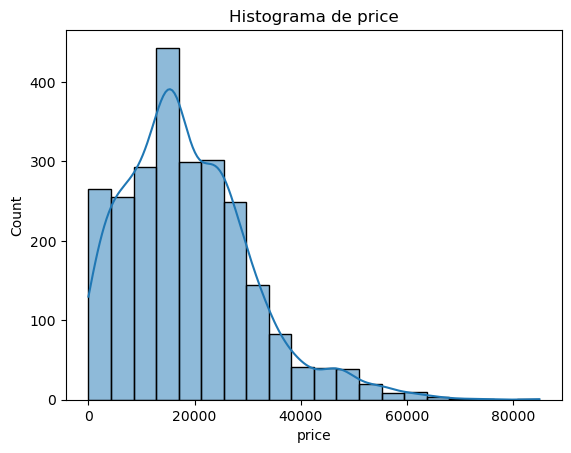

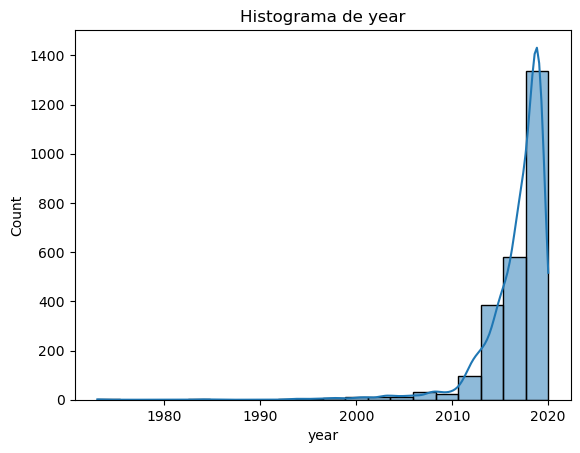

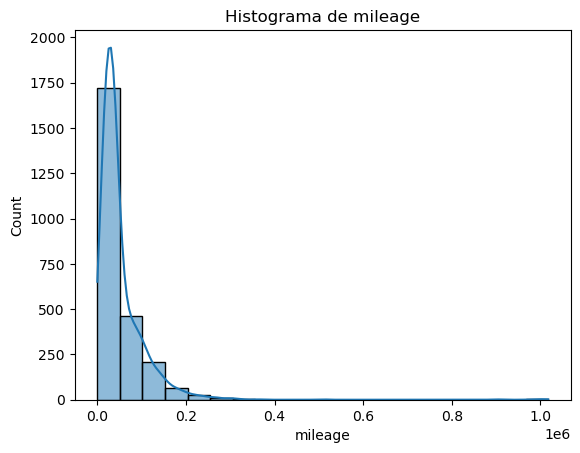

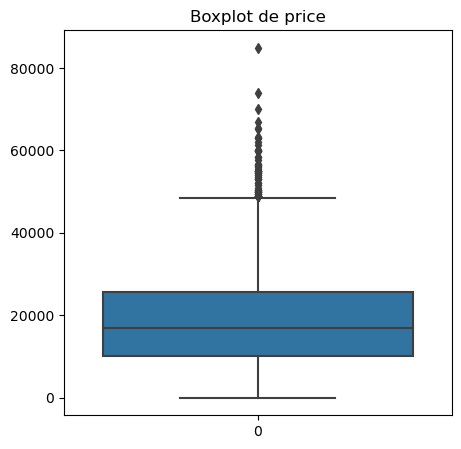

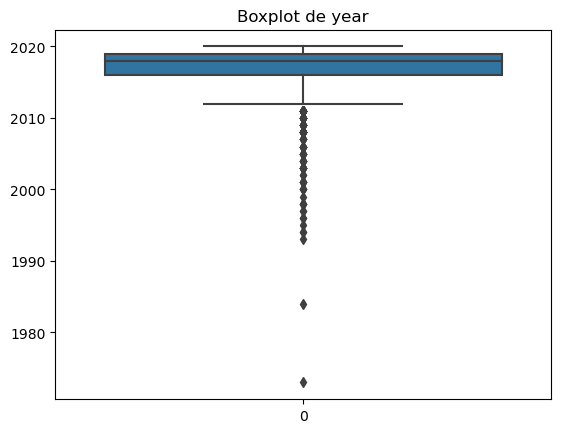

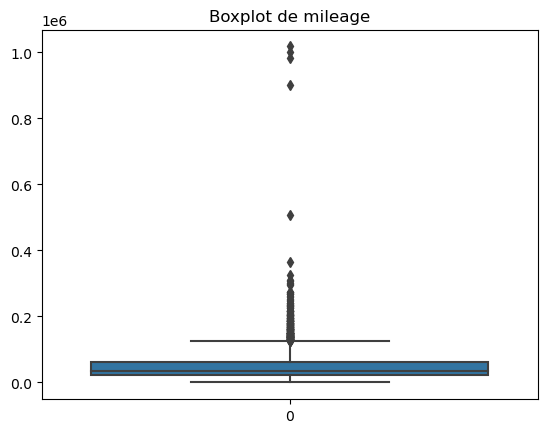

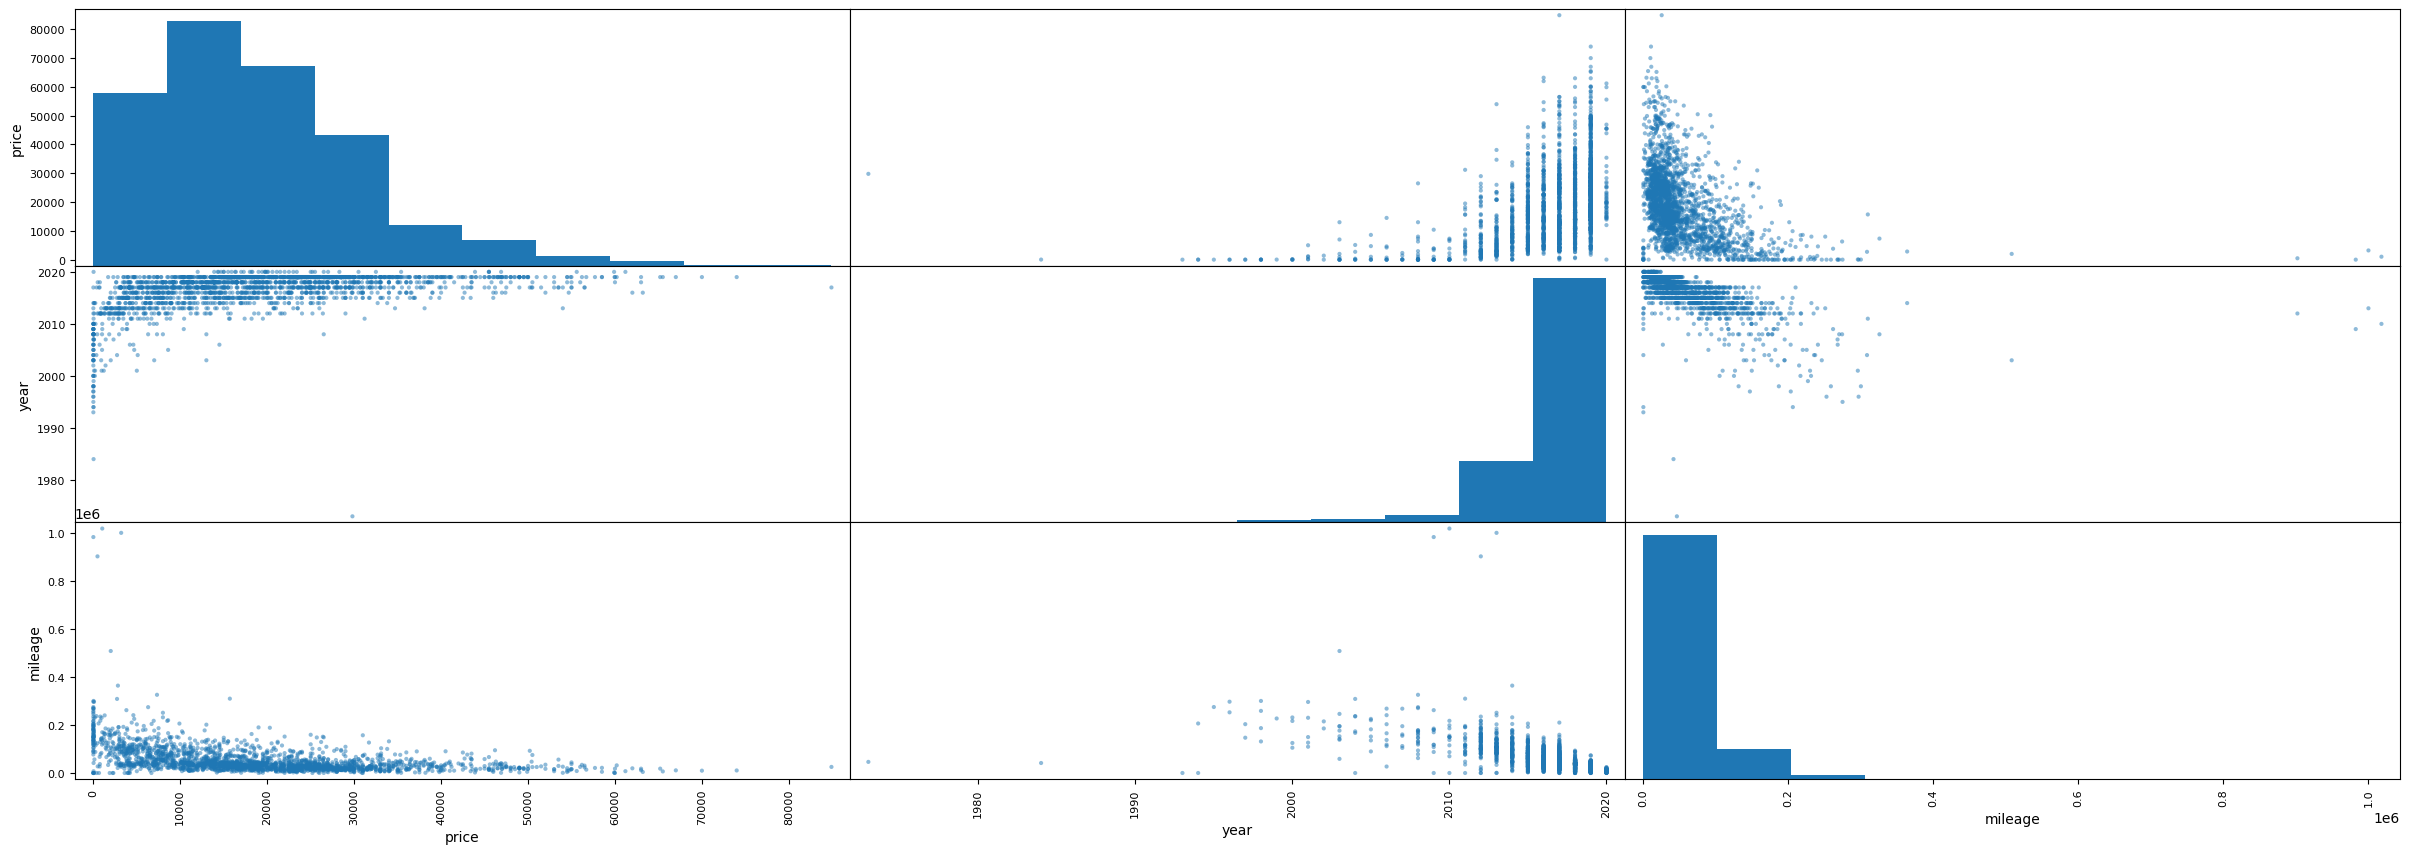

Matriz de correlación de las variables cuantitativas:


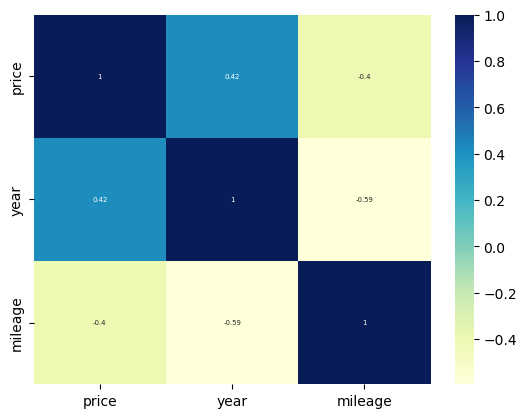

Número de valores nulos por columna:
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

Número de valores nulos por fila:
0       0
1       0
2       0
3       0
4       0
       ..
2494    0
2495    0
2496    0
2497    0
2498    0
Length: 2499, dtype: int64

Índices de las filas que contienen valores nulos:
[]
Outliers Encontrados:
número de outliers: 2499
max valor outlier: price             84900.0
brand                None
model                None
year               2011.0
title_status         None
mileage         1017936.0
color                None
state                None
country              None
dtype: object
min valor outlier: price            49000.0
brand               None
model               None
year              1973.0
title_status        None
mileage         126523.0
color               None
state               None
country             None
dtyp

C:\Users\NItro PC\AppData\Local\Temp\ipykernel_26132\3727643606.py:120: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  self.df, outliers = self.df.align(((self.df<(q1-1.5*IQR)) | (self.df>(q3+1.5*IQR))), axis=0, join='left', copy=False)


,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa


In [55]:
from sklearn.pipeline import Pipeline

# Crear pipeline con EDATransformer
pipeline = Pipeline([
    ('EDA', EDATransformer())
])

# Aplicar pipeline al DataFrame
pipeline.fit_transform(df)

# Label Encoding y/o One Hot Encoding
Podríamos usar Label Encoding y/o One Hot Encoding para el color del carro, las marca del carro y el title status.

In [65]:
#One Hot Encoding para la variable categórica Brand

one_hot = pd.get_dummies(df['brand'])

# Concatenar el DataFrame original con el DataFrame de One-Hot Encoding
df_encoded = pd.concat([df[['price','model', 'year', 'title_status', 'mileage', 'color']], one_hot], axis=1)
df_encoded

,price,model,year,title_status,mileage,color,acura,audi,bmw,buick,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,6300,cruiser,2008,clean vehicle,274117.0,black,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2899,se,2011,clean vehicle,190552.0,silver,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,mpv,2018,clean vehicle,39590.0,silver,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,door,2014,clean vehicle,64146.0,blue,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,1500,2018,clean vehicle,6654.0,red,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,versa,2019,clean vehicle,23609.0,red,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2495,9200,versa,2018,clean vehicle,34553.0,silver,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2496,9200,versa,2018,clean vehicle,31594.0,silver,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,9200,versa,2018,clean vehicle,32557.0,black,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
#Label encoding para title status
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])

df

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,27,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,8,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,7,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,8,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,5,1500,2018,clean vehicle,6654.0,red,florida,usa
...,...,...,...,...,...,...,...,...,...
2494,7800,24,versa,2019,clean vehicle,23609.0,red,california,usa
2495,9200,24,versa,2018,clean vehicle,34553.0,silver,florida,usa
2496,9200,24,versa,2018,clean vehicle,31594.0,silver,florida,usa
2497,9200,24,versa,2018,clean vehicle,32557.0,black,florida,usa


In [67]:
one_hot = pd.get_dummies(df['color'])

# Concatenar el DataFrame original con el DataFrame de One-Hot Encoding
df_encoded = pd.concat([df[['price','model', 'year', 'title_status', 'mileage','brand']], one_hot], axis=1)
df_encoded

,price,model,year,title_status,mileage,brand,beige,billet silver metallic clearcoat,black,black clearcoat,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,6300,cruiser,2008,clean vehicle,274117.0,27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,se,2011,clean vehicle,190552.0,8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5350,mpv,2018,clean vehicle,39590.0,7,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,25000,door,2014,clean vehicle,64146.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,1500,2018,clean vehicle,6654.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,versa,2019,clean vehicle,23609.0,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,9200,versa,2018,clean vehicle,34553.0,24,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2496,9200,versa,2018,clean vehicle,31594.0,24,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2497,9200,versa,2018,clean vehicle,32557.0,24,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
